In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Exploration and Preparation for Classification
- Understand data distribution, relationships, and trends.
- Visualize data using charts and plots.

In [224]:
# Load the dataset from Kaggle (replace the file path with your local file path if needed)
url = "../dataset/traffic_flow_dataset.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [226]:
df['Day of the week'].value_counts()

Day of the week
Tuesday      960
Wednesday    960
Thursday     960
Friday       768
Saturday     768
Sunday       768
Monday       768
Name: count, dtype: int64

In [227]:
df.describe()


,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


# Exploratory Data Analysis (EDA)

## Visualizing Total Traffic Over Time:
We will visualize the hourly Vehicle Counts: Breakdown by Type and Total

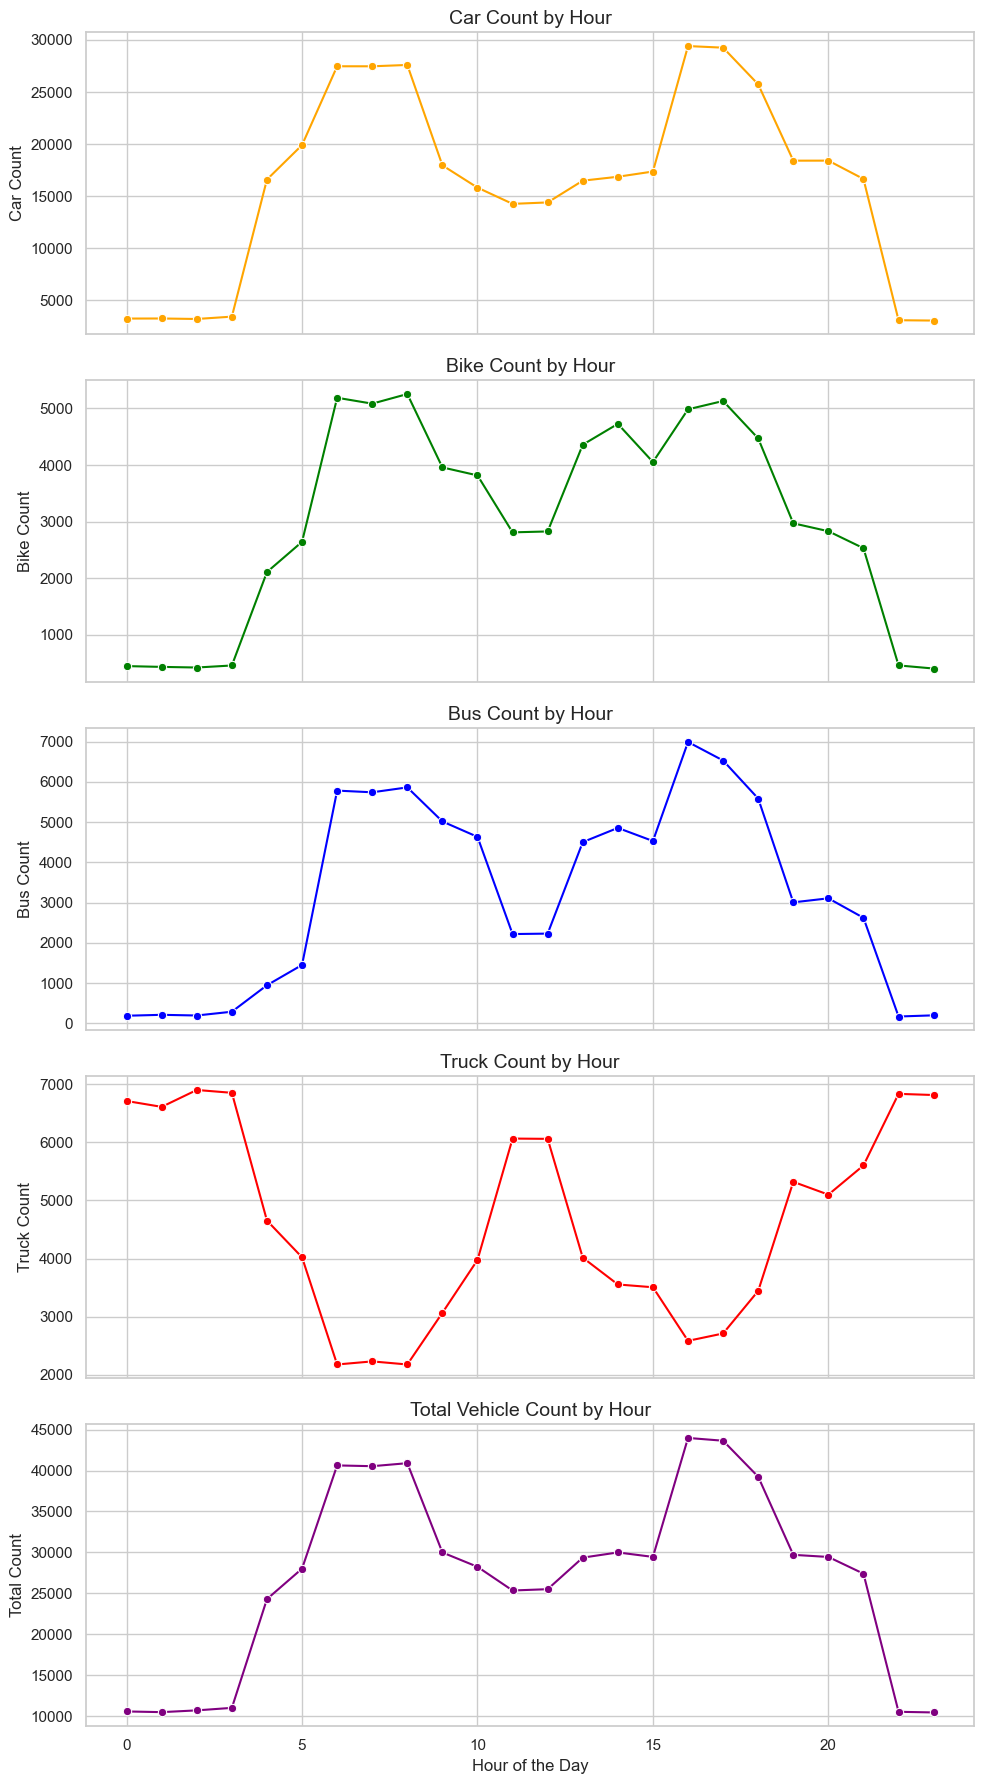

In [228]:
# Ensure the 'Time' column is in datetime format and extract the hour
df['hour'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour

# Select only numeric columns
numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

# Group by hour and sum the vehicle counts
hourly_data = df.groupby('hour')[numeric_columns].sum()

# Set the figure size and layout for separate plots
fig, axes = plt.subplots(5, 1, figsize=(10, 18), sharex=True)

# Plot for CarCount
sns.lineplot(x=hourly_data.index, y=hourly_data['CarCount'], ax=axes[0], color='orange', marker='o')
axes[0].set_title('Car Count by Hour', fontsize=14)
axes[0].set_ylabel('Car Count')

# Plot for BikeCount
sns.lineplot(x=hourly_data.index, y=hourly_data['BikeCount'], ax=axes[1], color='green', marker='o')
axes[1].set_title('Bike Count by Hour', fontsize=14)
axes[1].set_ylabel('Bike Count')

# Plot for BusCount
sns.lineplot(x=hourly_data.index, y=hourly_data['BusCount'], ax=axes[2], color='blue', marker='o')
axes[2].set_title('Bus Count by Hour', fontsize=14)
axes[2].set_ylabel('Bus Count')

# Plot for TruckCount
sns.lineplot(x=hourly_data.index, y=hourly_data['TruckCount'], ax=axes[3], color='red', marker='o')
axes[3].set_title('Truck Count by Hour', fontsize=14)
axes[3].set_ylabel('Truck Count')

# Plot for Total
sns.lineplot(x=hourly_data.index, y=hourly_data['Total'], ax=axes[4], color='purple', marker='o')
axes[4].set_title('Total Vehicle Count by Hour', fontsize=14)
axes[4].set_xlabel('Hour of the Day')
axes[4].set_ylabel('Total Count')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

C:\Users\surafel\AppData\Local\Temp\ipykernel_4144\2912553244.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_of_week_traffic = df.groupby('Day of the week')[numeric_columns].mean()


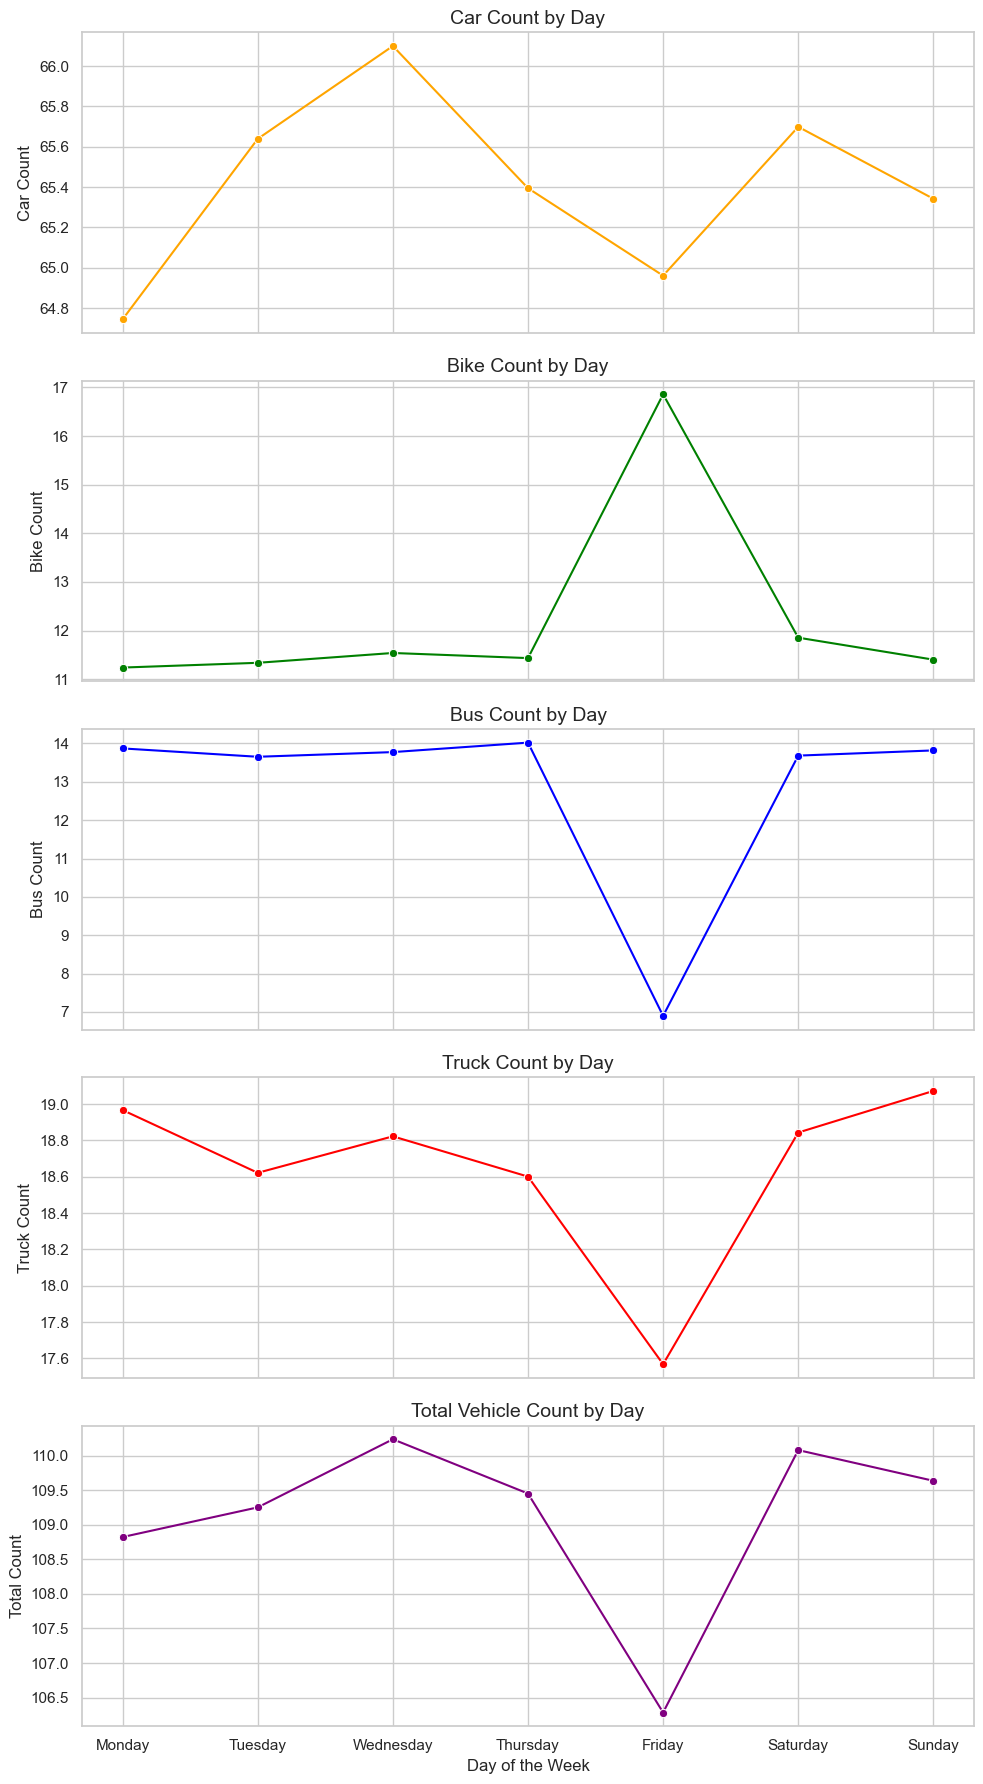

In [229]:
# Convert 'Day of the Week' to a categorical variable with a specified order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of the week'] = pd.Categorical(df['Day of the week'], categories=ordered_days, ordered=True)

# Select only numeric columns
numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

# Group by hour and sum the vehicle counts
day_of_week_traffic = df.groupby('Day of the week')[numeric_columns].mean()

# Set the figure size and layout for separate plots
fig, axes = plt.subplots(5, 1, figsize=(10, 18), sharex=True)

# Plot for CarCount
sns.lineplot(x=day_of_week_traffic.index, y=day_of_week_traffic['CarCount'], ax=axes[0], color='orange', marker='o')
axes[0].set_title('Car Count by Day', fontsize=14)
axes[0].set_ylabel('Car Count')

# Plot for BikeCount
sns.lineplot(x=day_of_week_traffic.index, y=day_of_week_traffic['BikeCount'], ax=axes[1], color='green', marker='o')
axes[1].set_title('Bike Count by Day', fontsize=14)
axes[1].set_ylabel('Bike Count')

# Plot for BusCount
sns.lineplot(x=day_of_week_traffic.index, y=day_of_week_traffic['BusCount'], ax=axes[2], color='blue', marker='o')
axes[2].set_title('Bus Count by Day', fontsize=14)
axes[2].set_ylabel('Bus Count')

# Plot for TruckCount
sns.lineplot(x=day_of_week_traffic.index, y=day_of_week_traffic['TruckCount'], ax=axes[3], color='red', marker='o')
axes[3].set_title('Truck Count by Day', fontsize=14)
axes[3].set_ylabel('Truck Count')

# Plot for Total
sns.lineplot(x=day_of_week_traffic.index, y=day_of_week_traffic['Total'], ax=axes[4], color='purple', marker='o')
axes[4].set_title('Total Vehicle Count by Day', fontsize=14)
axes[4].set_xlabel('Day of the Week')
axes[4].set_ylabel('Total Count')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

## Visualize Average Vehicle Count by Day of the Week
lets visualize the average vehicle count by the day of the week on which day its count is high.

C:\Users\surafel\AppData\Local\Temp\ipykernel_4144\3566498392.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('Day of the week')[numeric_columns].mean()


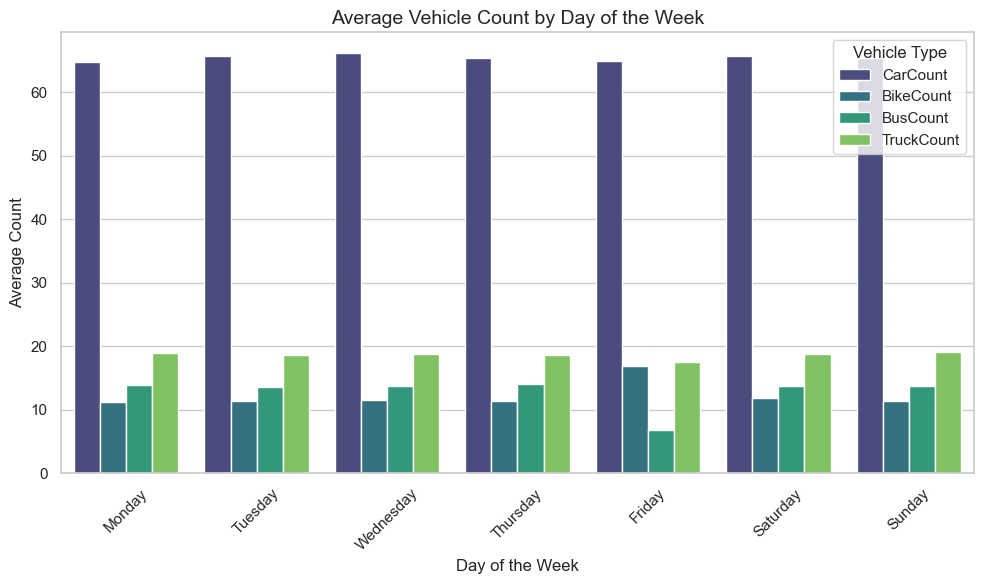

In [230]:
# Select only numeric columns
numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

# Group by 'Day of the week' and calculate the mean for only the selected numeric columns
grouped_df = df.groupby('Day of the week')[numeric_columns].mean()

# Reset the index to make 'Day of the week' a column again
grouped_df = grouped_df.reset_index()

# Use the melt function to reshape the DataFrame for seaborn
grouped_df_melted = pd.melt(grouped_df, id_vars='Day of the week', var_name='Vehicle Type', value_name='Count')

# Set plot style and size
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the barplot
sns.barplot(x='Day of the week', y='Count', hue='Vehicle Type', data=grouped_df_melted, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Average Vehicle Count by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Boxplot of Vehicle Count Distributions by Type
The box plot will be useful for visualizing the vehicle type distribution and identifying outliers 

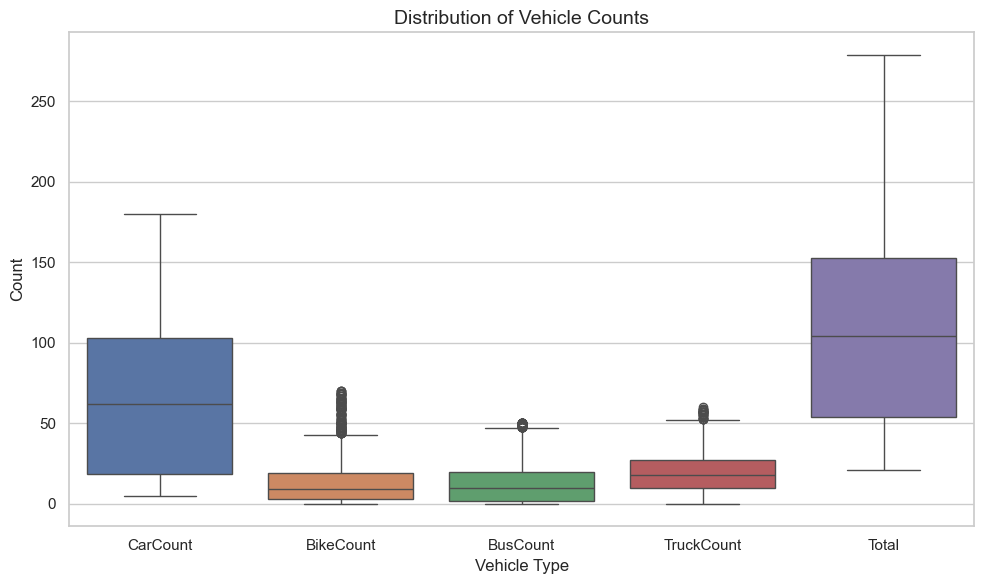

In [231]:
# Boxplot for distribution of vehicle counts
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']])

plt.title('Distribution of Vehicle Counts', fontsize=14)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

## Pie Chart of Average Contribution of Vehicle Types to Total Traffic
The pie chart is really useful for understanding the contribution of each vehicle type, which one really has more dominance. 

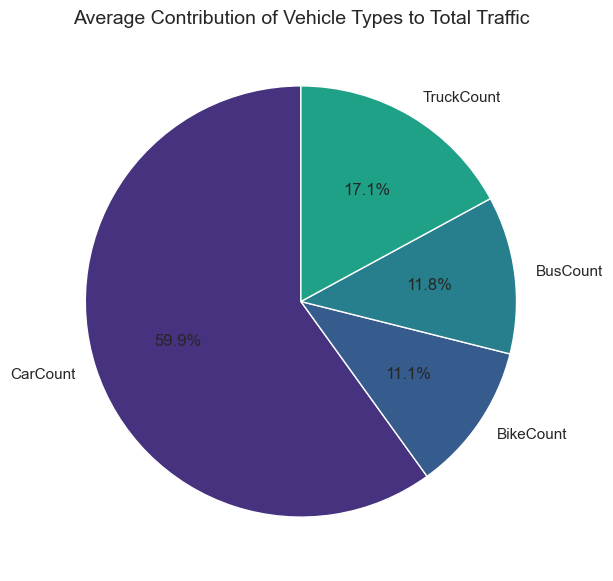

In [232]:
average_vehicle_counts = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()

plt.figure(figsize=(7, 7))
plt.pie(average_vehicle_counts, labels=average_vehicle_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

plt.title('Average Contribution of Vehicle Types to Total Traffic', fontsize=14)
plt.show()

# Data Cleaning:
- Handle missing values.
- Remove duplicates.
- Address outliers and inconsistencies.

In [233]:
# Check for missing values
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
hour                 0
dtype: int64

In [234]:
# Drop duplicates
df = df.drop_duplicates()

In [235]:
df['Date'].unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [236]:
# Calculate IQR for each vehicle type
Q1 = df[['BikeCount', 'BusCount', 'TruckCount']].quantile(0.25)
Q3 = df[['BikeCount', 'BusCount', 'TruckCount']].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[((df[['BikeCount', 'BusCount', 'TruckCount']] < lower_bound) | 
               (df[['BikeCount', 'BusCount', 'TruckCount']] > upper_bound))]

# Display outliers
# outliers
outliers[(outliers['BikeCount'].notnull()) | (outliers['BusCount'].notnull()) | (outliers['TruckCount'].notnull())]

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour
305,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN
306,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN
311,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5786,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN
5833,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN
5834,NaN,NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN
5888,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN


In [237]:
# Cap the outliers
df_cap = df.copy()

for col in ['BikeCount', 'BusCount', 'TruckCount']:
    df_cap[col] = df_cap[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Verify the changes
df_cap.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour
0,12:00:00 AM,10,Tuesday,13,2,2,24.0,41,normal,0
1,12:15:00 AM,10,Tuesday,14,1,1,36.0,52,normal,0
2,12:30:00 AM,10,Tuesday,10,2,2,32.0,46,normal,0
3,12:45:00 AM,10,Tuesday,10,2,2,36.0,50,normal,0
4,1:00:00 AM,10,Tuesday,11,2,1,34.0,48,normal,1


In [238]:
# check if handlin outliers is successfull 

outliers = df_cap[((df_cap[['BikeCount', 'BusCount', 'TruckCount']] < lower_bound) | 
               (df_cap[['BikeCount', 'BusCount', 'TruckCount']] > upper_bound))]
outliers[(outliers['BikeCount'].notnull()) | (outliers['BusCount'].notnull()) | (outliers['TruckCount'].notnull())]

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour


# Feature Engineering
lets create useful features like hour minute day of week and others.

In [239]:
# Parse 'Time' into proper time format
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time  # Only time is parsed

# Feature Engineering: Create features like hour, minute, and day of the week
df['hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour  # Extract hour from time
df['minute'] = pd.to_datetime(df['Time'].astype(str)).dt.minute  # Extract minute from time
df['day_of_week'] = df['Day of the week']  # We already have the day of the week
df['day_of_month'] = df['Date']  # Use the 'Date' column for the day of the month

C:\Users\surafel\AppData\Local\Temp\ipykernel_4144\3822660685.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour  # Extract hour from time
C:\Users\surafel\AppData\Local\Temp\ipykernel_4144\3822660685.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['minute'] = pd.to_datetime(df['Time'].astype(str)).dt.minute  # Extract minute from time


In [240]:
# Add time period (Morning, Afternoon, Evening, Night)
def get_time_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_period'] = df['hour'].apply(get_time_period)

In [241]:

# Display the DataFrame with feature-engineered columns
print(df[['Time', 'hour', 'minute', 'day_of_week', 'day_of_month', 'time_period']])

          Time  hour  minute day_of_week  day_of_month time_period
0     00:00:00     0       0     Tuesday            10       Night
1     00:15:00     0      15     Tuesday            10       Night
2     00:30:00     0      30     Tuesday            10       Night
3     00:45:00     0      45     Tuesday            10       Night
4     01:00:00     1       0     Tuesday            10       Night
...        ...   ...     ...         ...           ...         ...
5947  22:45:00    22      45    Thursday             9       Night
5948  23:00:00    23       0    Thursday             9       Night
5949  23:15:00    23      15    Thursday             9       Night
5950  23:30:00    23      30    Thursday             9       Night
5951  23:45:00    23      45    Thursday             9       Night

[5952 rows x 6 columns]


In [242]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables (if any) like 'day_of_week' and 'time_period'
day_of_week_encoder = LabelEncoder()
time_period_encoder = LabelEncoder()

df['day_of_week'] = day_of_week_encoder.fit_transform(df['day_of_week'])
df['time_period'] = time_period_encoder.fit_transform(df['time_period'])

df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,day_of_week,day_of_month,time_period
0,00:00:00,10,Tuesday,13,2,2,24,41,normal,0,0,5,10,3
1,00:15:00,10,Tuesday,14,1,1,36,52,normal,0,15,5,10,3
2,00:30:00,10,Tuesday,10,2,2,32,46,normal,0,30,5,10,3
3,00:45:00,10,Tuesday,10,2,2,36,50,normal,0,45,5,10,3
4,01:00:00,10,Tuesday,11,2,1,34,48,normal,1,0,5,10,3


In [243]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Select only numeric columns
numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

# Fit and transform the numerical columns
df[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

# Verify the scaling results
df[numeric_columns].head()

,CarCount,BikeCount,BusCount,TruckCount,Total
0,0.045714,0.028571,0.04,0.400000,0.077519
1,0.051429,0.014286,0.02,0.600000,0.120155
2,0.028571,0.028571,0.04,0.533333,0.096899
3,0.028571,0.028571,0.04,0.600000,0.112403
4,0.034286,0.028571,0.02,0.566667,0.104651


## Data Splitting:
-  Split the Data into Training, Validation, and Testing Sets

In [244]:
# Separate features (X) and target (y)
X = df[['hour', 'minute', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'day_of_week', 'day_of_month', 'time_period']]
y = df['Traffic Situation']  # target column we want to predict

# Convert the target variable to numerical format
y_label_encoder = LabelEncoder()
y = y_label_encoder.fit_transform(y)

# Split the data into training, temporary validation + test, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shape of the data after splitting
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (4761, 9)
Validation data shape: (595, 9)
Test data shape: (596, 9)


## Initialize Models (Random Forest, Decision Tree, Logistic Regression)

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
log_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000, random_state=42)


## Model Training - Random Forest

In [246]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
rf_val_pred = rf_model.predict(X_val)

# Calculate the validation accuracy
rf_val_accuracy = accuracy_score(y_val, rf_val_pred)

# Display the validation accuracy for Random Forest
print(f"Random Forest Validation Accuracy: {rf_val_accuracy:.2f}")


Random Forest Validation Accuracy: 0.97


## Model Training - Decision Tree

In [247]:
# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions on the validation set
dt_val_pred = dt_model.predict(X_val)

# Calculate the validation accuracy
dt_val_accuracy = accuracy_score(y_val, dt_val_pred)

# Display the validation accuracy for Decision Tree
print(f"Decision Tree Validation Accuracy: {dt_val_accuracy:.2f}")


Decision Tree Validation Accuracy: 0.94


## Model Training - Logistic Regression

In [248]:
# Train the Logistic Regression model
log_model.fit(X_train, y_train)

# Make predictions on the validation set
log_val_pred = log_model.predict(X_val)

# Calculate the validation accuracy
log_val_accuracy = accuracy_score(y_val, log_val_pred)

# Display the validation accuracy for Logistic Regression
print(f"Logistic Regression Validation Accuracy: {log_val_accuracy:.2f}")


Logistic Regression Validation Accuracy: 0.88


C:\Users\surafel\Desktop\ML project\ml-classification-regression-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Hyperparameter Tuning for Random Forest

In [249]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Display the best parameters
print(f"Best Random Forest Model Parameters: {grid_search_rf.best_params_}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Model Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Hyperparameter Tuning for Decision Tree

In [250]:
# Define the hyperparameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_dt_model = grid_search_dt.best_estimator_

# Display the best parameters
print(f"Best Decision Tree Model Parameters: {grid_search_dt.best_params_}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Decision Tree Model Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}


## Evaluate Best Random Forest Model on Validation Set

In [251]:
# Make predictions with the best Random Forest model
best_rf_val_pred = best_rf_model.predict(X_val)

# Calculate validation accuracy for the best Random Forest model
best_rf_val_accuracy = accuracy_score(y_val, best_rf_val_pred)

# Display the validation accuracy
print(f"Best Random Forest Validation Accuracy: {best_rf_val_accuracy:.2f}")


Best Random Forest Validation Accuracy: 0.97


## Evaluate Best Decision Tree Model on Validation Set

In [252]:
# Make predictions with the best Decision Tree model
best_dt_val_pred = best_dt_model.predict(X_val)

# Calculate validation accuracy for the best Decision Tree model
best_dt_val_accuracy = accuracy_score(y_val, best_dt_val_pred)

# Display the validation accuracy
print(f"Best Decision Tree Validation Accuracy: {best_dt_val_accuracy:.2f}")


Best Decision Tree Validation Accuracy: 0.94


## Train Best Models on Full Training Data

In [253]:
# Train the best models on the full training data (including validation data)
best_rf_model.fit(X_train, y_train)
best_dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [254]:
# Make predictions on the test set with the best Random Forest model
rf_test_pred = best_rf_model.predict(X_test)

# Make predictions on the test set with the best Decision Tree model
dt_test_pred = best_dt_model.predict(X_test)

# Calculate test accuracy for both models
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)

# Display the test accuracy for both models
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.2f}")
print(f"Decision Tree Test Accuracy: {dt_test_accuracy:.2f}")


Random Forest Test Accuracy: 0.97
Decision Tree Test Accuracy: 0.96


In [255]:
# Make predictions on the training set
rf_train_pred = best_rf_model.predict(X_train)
dt_train_pred = best_dt_model.predict(X_train)

# Evaluate the training accuracy
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)

# Print the training accuracy
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.2f}")
print(f"Decision Tree Training Accuracy: {dt_train_accuracy:.2f}")

# Compare with validation accuracy
print(f"Random Forest Validation Accuracy: {best_rf_val_accuracy:.2f}")
print(f"Decision Tree Validation Accuracy: {best_dt_val_accuracy:.2f}")

# And test accuracy:
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.2f}")
print(f"Decision Tree Test Accuracy: {dt_test_accuracy:.2f}")


Random Forest Training Accuracy: 1.00
Decision Tree Training Accuracy: 0.99
Random Forest Validation Accuracy: 0.97
Decision Tree Validation Accuracy: 0.94
Random Forest Test Accuracy: 0.97
Decision Tree Test Accuracy: 0.96


In [257]:
import joblib

# Save the best model to a file (Random Forest or Decision Tree)
best_model = best_rf_model if rf_test_accuracy > dt_test_accuracy else best_dt_model
joblib.dump(best_model, '../model/traffic_flow/model.pkl')

# Save the scaler to a file
joblib.dump(min_max_scaler, '../model/traffic_flow/scaler.pkl')

# Save the label encoder scaler to a file
joblib.dump(time_period_encoder, '../model/traffic_flow/time_period_encoder.pkl')
joblib.dump(day_of_week_encoder, '../model/traffic_flow/day_of_week_encoder.pkl')
joblib.dump(y_label_encoder, '../model/traffic_flow/y_label_encoder.pkl')

['../model/traffic_flow/y_label_encoder.pkl']